In [3]:
#Precision = accurate predictions
#Recall = number(quantity) of correct predictions e.g high recall (of 1) means it got a lot of people with heart disease
#0 = False = does not have heart disease, 1 = True = have heart disease

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, auc, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
df = pd.read_csv('Heart Disease Predictions.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5503,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
5504,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
5505,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
5506,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.428333,18.505747,109.334476,0.422854,25.448773,1.066086,0.497188
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#Define functons to remove outliers
#outliers in the Cholesterol and RestingBP columns were removed

def drop_outlier(data, var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop = True, inplace = True)
    return data

In [9]:
df = drop_outlier(df, 'Cholesterol')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
4406,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
4407,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
4408,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

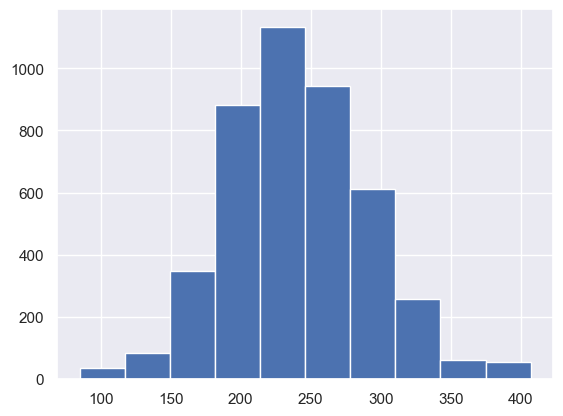

In [10]:
df['Cholesterol'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x16fb30992d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16fb4382890>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fb4380450>],
 'medians': [<matplotlib.lines.Line2D at 0x16fb4383f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x16fb438c990>],
 'means': []}

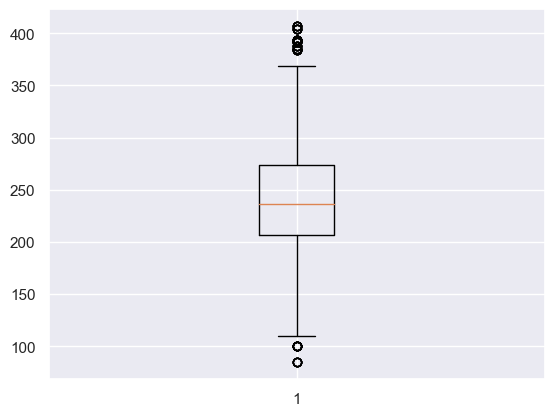

In [11]:
plt.boxplot(df['Cholesterol'])

In [12]:
df = drop_outlier(df, 'RestingBP')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4213,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
4214,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
4215,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
4216,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

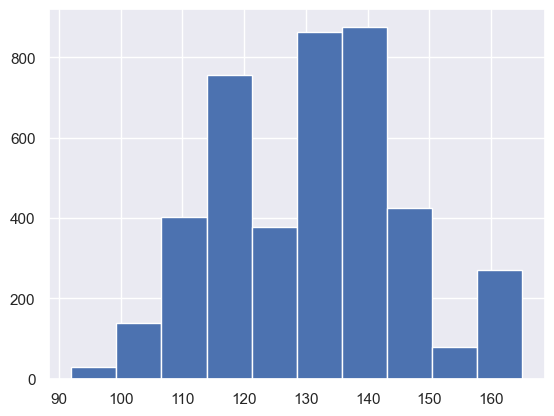

In [13]:
df['RestingBP'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x16fb5449ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x16fb544b4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fb5449350>],
 'medians': [<matplotlib.lines.Line2D at 0x16fb5454a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x16fb54554d0>],
 'means': []}

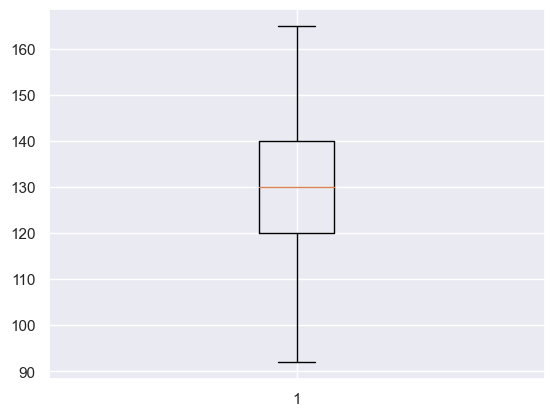

In [14]:
plt.boxplot(df['RestingBP'])

In [15]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4213,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
4214,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
4215,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
4216,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
df1 = df.select_dtypes(include=['object']).copy()
df1

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
4213,M,TA,Normal,N,Flat
4214,M,ASY,Normal,N,Flat
4215,M,ASY,Normal,Y,Flat
4216,F,ATA,LVH,N,Flat


In [17]:
#converting object columns to categorical
df2 = df1.astype('category')
df2

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
4213,M,TA,Normal,N,Flat
4214,M,ASY,Normal,N,Flat
4215,M,ASY,Normal,Y,Flat
4216,F,ATA,LVH,N,Flat


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4218 non-null   category
 1   ChestPainType   4218 non-null   category
 2   RestingECG      4218 non-null   category
 3   ExerciseAngina  4218 non-null   category
 4   ST_Slope        4218 non-null   category
dtypes: category(5)
memory usage: 21.4 KB


In [19]:
df_dumy = pd.get_dummies(df2, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], prefix=["Sex", "ChestPT", "restingECG", "ExAngina", "ST_slope"])
df_dumy

,Sex_F,Sex_M,ChestPT_ASY,ChestPT_ATA,ChestPT_NAP,ChestPT_TA,restingECG_LVH,restingECG_Normal,restingECG_ST,ExAngina_N,ExAngina_Y,ST_slope_Down,ST_slope_Flat,ST_slope_Up
0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,False,True,False,False,False,True,False,True,False,True,False,False,True,False
4214,False,True,True,False,False,False,False,True,False,True,False,False,True,False
4215,False,True,True,False,False,False,False,True,False,False,True,False,True,False
4216,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [20]:
cols = df_dumy.columns
cols

Index(['Sex_F', 'Sex_M', 'ChestPT_ASY', 'ChestPT_ATA', 'ChestPT_NAP',
       'ChestPT_TA', 'restingECG_LVH', 'restingECG_Normal', 'restingECG_ST',
       'ExAngina_N', 'ExAngina_Y', 'ST_slope_Down', 'ST_slope_Flat',
       'ST_slope_Up'],
      dtype='object')

In [21]:
#Merging the train dumy to the main train dataset
df = pd.concat([df, df_dumy],axis=1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPT_NAP,ChestPT_TA,restingECG_LVH,restingECG_Normal,restingECG_ST,ExAngina_N,ExAngina_Y,ST_slope_Down,ST_slope_Flat,ST_slope_Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,False,False,False,True,False,True,False,False,False,True
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,True,False,False,True,False,True,False,False,True,False
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,False,False,False,False,True,True,False,False,False,True
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,False,False,False,True,False,False,True,False,True,False
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,45,M,TA,110,264,0,Normal,132,N,1.2,...,False,True,False,True,False,True,False,False,True,False
4214,68,M,ASY,144,193,1,Normal,141,N,3.4,...,False,False,False,True,False,True,False,False,True,False
4215,57,M,ASY,130,131,0,Normal,115,Y,1.2,...,False,False,False,True,False,False,True,False,True,False
4216,57,F,ATA,130,236,0,LVH,174,N,0.0,...,False,False,True,False,False,True,False,False,True,False


In [22]:
#ACTION 1 - Encode the data
#Encoding the categorical columns in the merged train dataset
encoder = OneHotEncoder(categories='auto', drop='first', 
    sparse=False)

df['Sex_F']=encoder.fit_transform(df['Sex_F'].values.reshape(-1,1))
df['Sex_M']=encoder.fit_transform(df['Sex_M'].values.reshape(-1,1))
df['ChestPT_ASY']=encoder.fit_transform(df['ChestPT_ASY'].values.reshape(-1,1))
df['ChestPT_NAP']=encoder.fit_transform(df['ChestPT_NAP'].values.reshape(-1,1))
df['ChestPT_TA']=encoder.fit_transform(df['ChestPT_TA'].values.reshape(-1,1))
df['ChestPT_ATA']=encoder.fit_transform(df['ChestPT_ATA'].values.reshape(-1,1))
df['restingECG_LVH']=encoder.fit_transform(df['restingECG_LVH'].values.reshape(-1,1))
df['restingECG_Normal']=encoder.fit_transform(df['restingECG_Normal'].values.reshape(-1,1))
df['restingECG_ST']=encoder.fit_transform(df['restingECG_ST'].values.reshape(-1,1))
df['ExAngina_N']=encoder.fit_transform(df['ExAngina_N'].values.reshape(-1,1))
df['ExAngina_Y']=encoder.fit_transform(df['ExAngina_Y'].values.reshape(-1,1))
df['ST_slope_Down']=encoder.fit_transform(df['ST_slope_Down'].values.reshape(-1,1))
df['ST_slope_Flat']=encoder.fit_transform(df['ST_slope_Flat'].values.reshape(-1,1))
df['ST_slope_Up']=encoder.fit_transform(df['ST_slope_Up'].values.reshape(-1,1))

C:\Users\Godgive Computer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Godgive Computer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Godgive Computer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Godgive Computer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output`

In [23]:
#ACTION 2 - Remove extra columns
#drop some extra columns
df.drop(['Sex'], axis =1, inplace = True)

In [24]:
df.drop(['ChestPainType','RestingECG'], axis =1, inplace = True)

In [25]:
df.drop(['ExerciseAngina'], axis =1, inplace = True)

In [26]:
df.drop(['ST_Slope'], axis =1, inplace = True)

In [27]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPT_ASY,...,ChestPT_NAP,ChestPT_TA,restingECG_LVH,restingECG_Normal,restingECG_ST,ExAngina_N,ExAngina_Y,ST_slope_Down,ST_slope_Flat,ST_slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4214,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4215,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4216,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
#Splitting the dataset into train and test
train, test = train_test_split (df, test_size=0.2, random_state=123)

In [29]:
train.reset_index(drop=True, inplace=True)
train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPT_ASY,...,ChestPT_NAP,ChestPT_TA,restingECG_LVH,restingECG_Normal,restingECG_ST,ExAngina_N,ExAngina_Y,ST_slope_Down,ST_slope_Flat,ST_slope_Up
0,56,120,240,0,169,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,57,140,241,0,123,0.2,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,51,125,245,1,166,2.4,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50,144,349,0,120,1.0,1,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,42,160,147,0,146,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,47,110,249,0,150,0.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3370,67,152,277,0,172,0.0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3371,52,120,325,0,172,0.2,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3372,47,138,257,0,156,0.0,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [30]:
train.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPT_ASY', 'ChestPT_ATA',
       'ChestPT_NAP', 'ChestPT_TA', 'restingECG_LVH', 'restingECG_Normal',
       'restingECG_ST', 'ExAngina_N', 'ExAngina_Y', 'ST_slope_Down',
       'ST_slope_Flat', 'ST_slope_Up'],
      dtype='object')

In [31]:
#ACTION 1 - split data to features and target
y_train = train['HeartDisease']
x_train = train.drop(['HeartDisease'], axis=1)

In [32]:
cols = x_train.columns
cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPT_ASY', 'ChestPT_ATA', 'ChestPT_NAP',
       'ChestPT_TA', 'restingECG_LVH', 'restingECG_Normal', 'restingECG_ST',
       'ExAngina_N', 'ExAngina_Y', 'ST_slope_Down', 'ST_slope_Flat',
       'ST_slope_Up'],
      dtype='object')

In [33]:
#ACTION 2 - Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [34]:
x_train

array([[ 3.41615661e-01, -7.51898383e-01, -5.25517103e-05, ...,
         4.38219041e+00, -9.49692883e-01, -9.53651428e-01],
       [ 4.46675477e-01,  6.01225944e-01,  1.96485006e-02, ...,
        -2.28196383e-01,  1.05297198e+00, -9.53651428e-01],
       [-1.83683419e-01, -4.13617301e-01,  9.84527097e-02, ...,
        -2.28196383e-01,  1.05297198e+00, -9.53651428e-01],
       ...,
       [-7.86236026e-02, -7.51898383e-01,  1.67453689e+00, ...,
        -2.28196383e-01, -9.49692883e-01,  1.04860117e+00],
       [-6.03922682e-01,  4.65913511e-01,  3.34865337e-01, ...,
        -2.28196383e-01, -9.49692883e-01,  1.04860117e+00],
       [ 4.46675477e-01,  6.01225944e-01,  4.92473755e-01, ...,
        -2.28196383e-01,  1.05297198e+00, -9.53651428e-01]])

In [35]:
#moving the scaled data into a tabular form, using the columns of the initial data
features = pd.DataFrame(x_train, columns=cols)
features

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPT_ASY,ChestPT_ATA,ChestPT_NAP,ChestPT_TA,restingECG_LVH,restingECG_Normal,restingECG_ST,ExAngina_N,ExAngina_Y,ST_slope_Down,ST_slope_Flat,ST_slope_Up
0,0.341616,-0.751898,-0.000053,-0.434104,1.182472,-0.827305,-0.553840,0.553840,-0.996450,1.880145,-0.551098,-0.225306,-0.558408,0.823269,-0.446577,0.796177,-0.796177,4.382190,-0.949693,-0.953651
1,0.446675,0.601226,0.019649,-0.434104,-0.712325,-0.639527,1.805575,-1.805575,1.003563,-0.531874,-0.551098,-0.225306,-0.558408,0.823269,-0.446577,-1.256002,1.256002,-0.228196,1.052972,-0.953651
2,-0.183683,-0.413617,0.098453,2.303593,1.058899,1.426037,-0.553840,0.553840,-0.996450,-0.531874,1.814558,-0.225306,1.790805,-1.214669,-0.446577,0.796177,-0.796177,-0.228196,1.052972,-0.953651
3,-0.288743,0.871851,2.147362,-0.434104,-0.835899,0.111587,-0.553840,0.553840,1.003563,-0.531874,-0.551098,-0.225306,1.790805,-1.214669,-0.446577,-1.256002,1.256002,-0.228196,-0.949693,1.048601
4,-1.129222,1.954350,-1.832250,-0.434104,0.235073,-0.827305,-0.553840,0.553840,-0.996450,-0.531874,1.814558,-0.225306,-0.558408,0.823269,-0.446577,0.796177,-0.796177,-0.228196,-0.949693,1.048601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,-0.603923,-1.428461,0.177257,-0.434104,0.399838,-0.827305,-0.553840,0.553840,-0.996450,-0.531874,-0.551098,4.438399,-0.558408,0.823269,-0.446577,0.796177,-0.796177,-0.228196,-0.949693,1.048601
3370,1.497274,1.413101,0.728886,-0.434104,1.306046,-0.827305,1.805575,-1.805575,-0.996450,-0.531874,1.814558,-0.225306,-0.558408,0.823269,-0.446577,0.796177,-0.796177,-0.228196,-0.949693,1.048601
3371,-0.078624,-0.751898,1.674537,-0.434104,1.306046,-0.639527,-0.553840,0.553840,-0.996450,1.880145,-0.551098,-0.225306,-0.558408,0.823269,-0.446577,0.796177,-0.796177,-0.228196,-0.949693,1.048601
3372,-0.603923,0.465914,0.334865,-0.434104,0.646986,-0.827305,-0.553840,0.553840,-0.996450,-0.531874,1.814558,-0.225306,1.790805,-1.214669,-0.446577,0.796177,-0.796177,-0.228196,-0.949693,1.048601


In [36]:
#we need to check for multicolnearity, however this is to be done using only the numerical (contnuous) columns not categorcal cols
cont_features= ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

<Axes: >

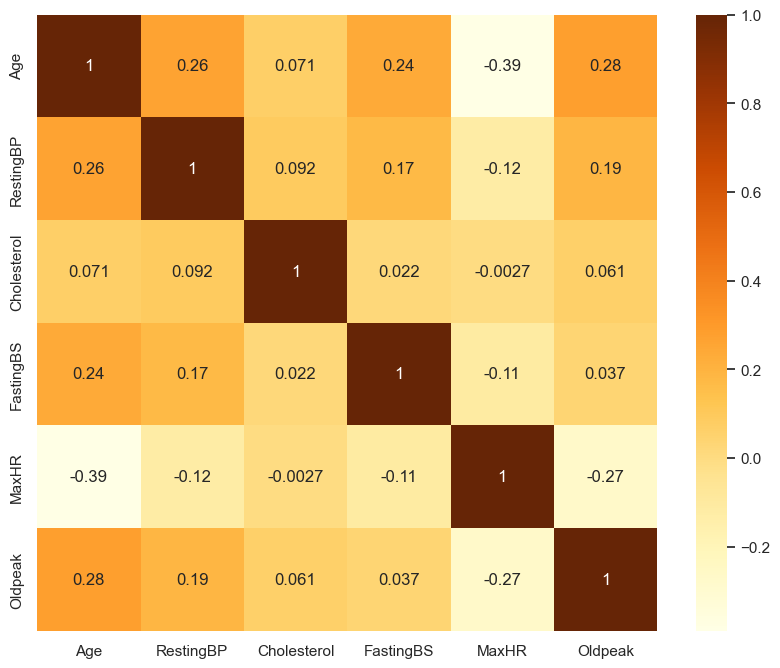

In [37]:
#checking for multcollnearity.
#im using a multicolnearity limit of 0.85, if there are 2 or more columns above 0.85, one of it would be dropped.
plt.figure(figsize=(10, 8))
corre = features[cont_features].corr()
sns.heatmap(corre, annot=True, cmap="YlOrBr")

In [38]:
#*Feature Importance**

In [39]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(x_train, y_train)
predictors = cols

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
ST_slope_Up,0.435837
MaxHR,0.102260
Cholesterol,0.071688
RestingBP,0.068260
Oldpeak,0.067412
ChestPT_ASY,0.060250
Sex_M,0.058591
Age,0.047674
ExAngina_Y,0.038848
restingECG_LVH,0.014201


In [40]:
#prepare pipeline for data transformation
def prepare(df): 
    y_test = df['HeartDisease']
    x_test = test.drop(['HeartDisease'], axis=1)
    
    cols = x_test.columns
    scaler = StandardScaler()
    x_test = scaler.fit_transform(x_test)
    
    return x_test, y_test

In [41]:
x_test, y_test = prepare(test)

In [42]:
x_train.shape

(3374, 20)

In [43]:
y_test.value_counts()

HeartDisease
0    476
1    368
Name: count, dtype: int64

In [44]:
x_train

array([[ 3.41615661e-01, -7.51898383e-01, -5.25517103e-05, ...,
         4.38219041e+00, -9.49692883e-01, -9.53651428e-01],
       [ 4.46675477e-01,  6.01225944e-01,  1.96485006e-02, ...,
        -2.28196383e-01,  1.05297198e+00, -9.53651428e-01],
       [-1.83683419e-01, -4.13617301e-01,  9.84527097e-02, ...,
        -2.28196383e-01,  1.05297198e+00, -9.53651428e-01],
       ...,
       [-7.86236026e-02, -7.51898383e-01,  1.67453689e+00, ...,
        -2.28196383e-01, -9.49692883e-01,  1.04860117e+00],
       [-6.03922682e-01,  4.65913511e-01,  3.34865337e-01, ...,
        -2.28196383e-01, -9.49692883e-01,  1.04860117e+00],
       [ 4.46675477e-01,  6.01225944e-01,  4.92473755e-01, ...,
        -2.28196383e-01,  1.05297198e+00, -9.53651428e-01]])

In [45]:
y_test.shape

(844,)

In [46]:
y_test

1413    0
2119    0
1109    0
1286    1
2343    1
       ..
1170    0
3759    0
2405    0
3755    0
2638    1
Name: HeartDisease, Length: 844, dtype: int64

In [47]:
x_test.shape

(844, 20)

In [48]:
## Model Building

In [49]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo == 'LR':
        model = LogisticRegression()
    return model

In [50]:
def performance(model, x_train, y_train, x_test, y_test):
    y_pred = model.predict(x_test)
    
    #predict probability for test dataset
    y_pred_prob = model.predict_proba(x_test)
    y_pred_prob = [x[1] for x in y_pred_prob]
    
    disp = ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test,
    cmap ='Blues', values_format='d',
    display_labels=['Have Heart Disease', 'Does not have Heart Disease']
)
    
    print ("\n Accuracy Score : \n ", accuracy_score(y_test,y_pred))
    print ("\n AUC Score : \n ", roc_auc_score(y_test, y_pred))
    print ("\n Confusion Matrix : \n ", confusion_matrix(y_test, y_pred))
    print ("\n Classification Report : \n ", classification_report(y_test, y_pred))
    
    print ("\n ROC curve : \n")
    sns.set_style("white")
    RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.show()


 Accuracy Score : 
  0.8613744075829384

 AUC Score : 
  0.8641532700036536

 Confusion Matrix : 
  [[401  75]
 [ 42 326]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.91      0.84      0.87       476
           1       0.81      0.89      0.85       368

    accuracy                           0.86       844
   macro avg       0.86      0.86      0.86       844
weighted avg       0.86      0.86      0.86       844


 ROC curve : 



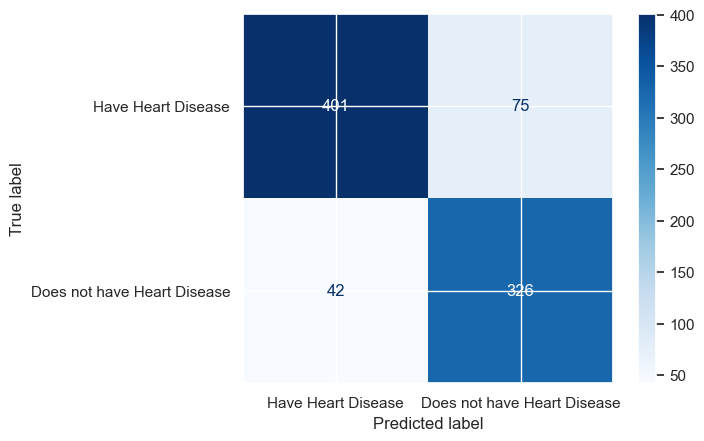

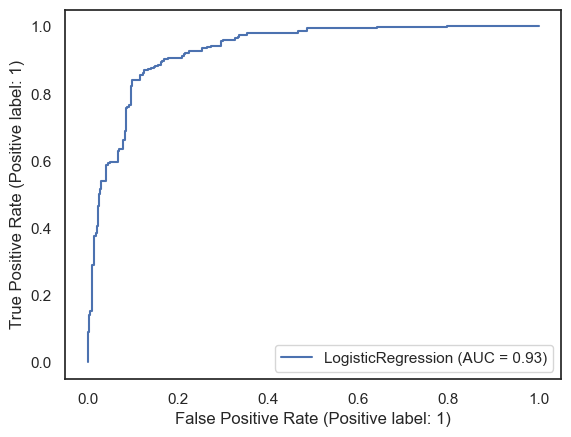

In [51]:
model = model_to_use("LR")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)

[LightGBM] [Info] Number of positive: 1606, number of negative: 1768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 3374, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475993 -> initscore=-0.096102
[LightGBM] [Info] Start training from score -0.096102

 Accuracy Score : 
  0.9988151658767772

 AUC Score : 
  0.9986413043478262

 Confusion Matrix : 
  [[476   0]
 [  1 367]]

 Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       1.00      1.00      1.00       368

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.

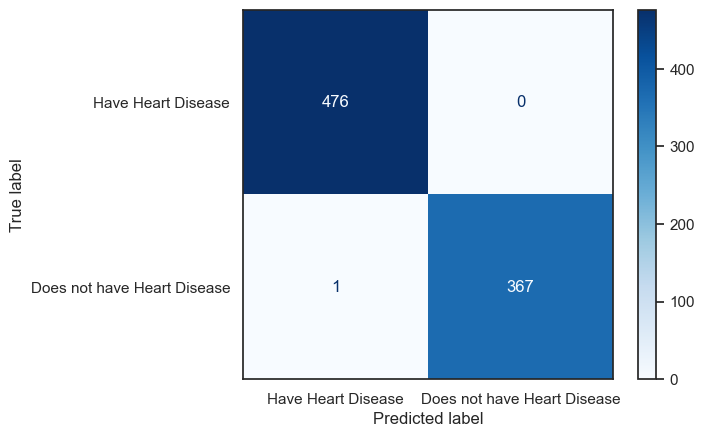

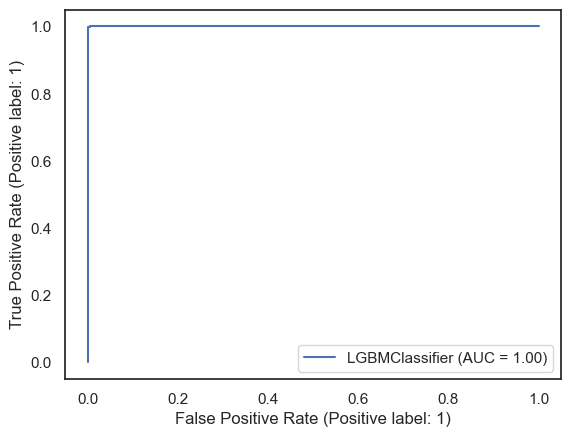

In [52]:
model = model_to_use("LGBMC")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)


 Accuracy Score : 
  0.6232227488151659

 AUC Score : 
  0.6659663865546219

 Confusion Matrix : 
  [[158 318]
 [  0 368]]

 Classification Report : 
                precision    recall  f1-score   support

           0       1.00      0.33      0.50       476
           1       0.54      1.00      0.70       368

    accuracy                           0.62       844
   macro avg       0.77      0.67      0.60       844
weighted avg       0.80      0.62      0.59       844


 ROC curve : 



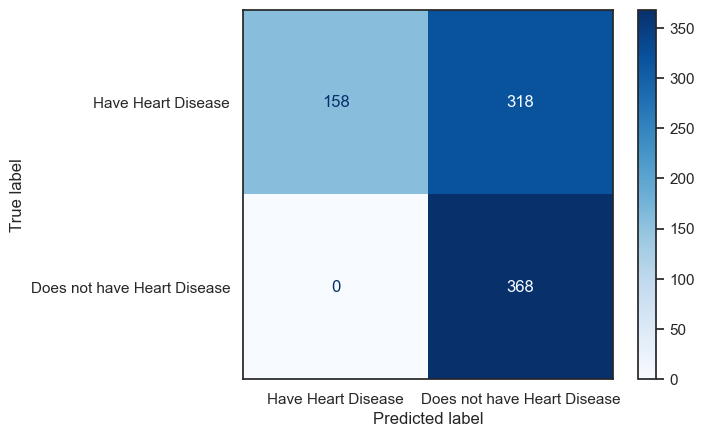

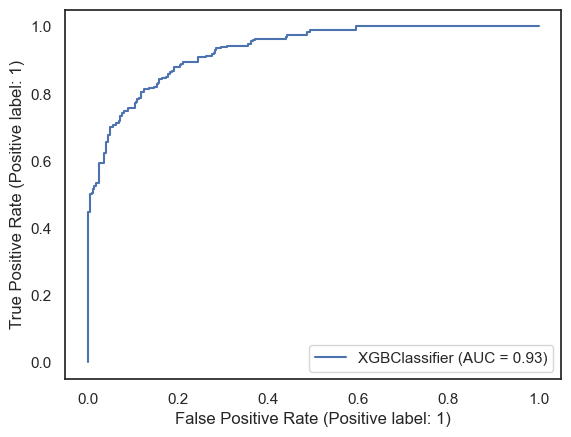

In [53]:
model = model_to_use("XGBC")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)


 Accuracy Score : 
  1.0

 AUC Score : 
  1.0

 Confusion Matrix : 
  [[476   0]
 [  0 368]]

 Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       1.00      1.00      1.00       368

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844


 ROC curve : 



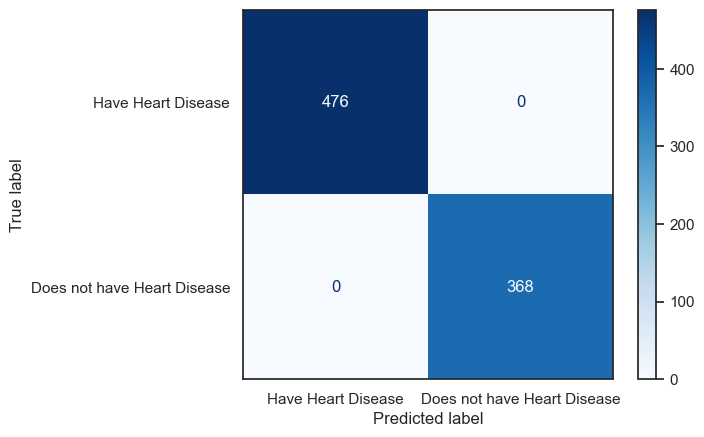

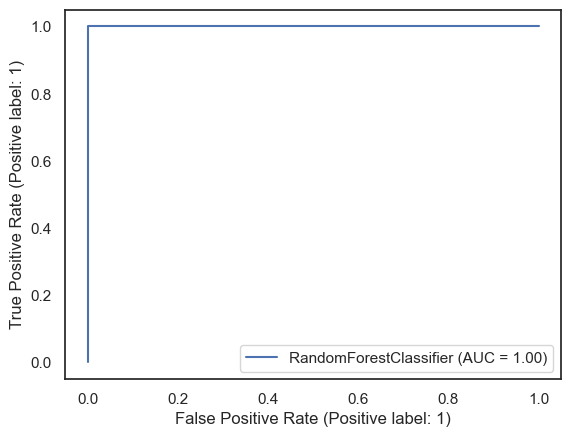

In [54]:
model = model_to_use("RF")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)


 Accuracy Score : 
  0.981042654028436

 AUC Score : 
  0.9810353489221775

 Confusion Matrix : 
  [[467   9]
 [  7 361]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.99      0.98      0.98       476
           1       0.98      0.98      0.98       368

    accuracy                           0.98       844
   macro avg       0.98      0.98      0.98       844
weighted avg       0.98      0.98      0.98       844


 ROC curve : 



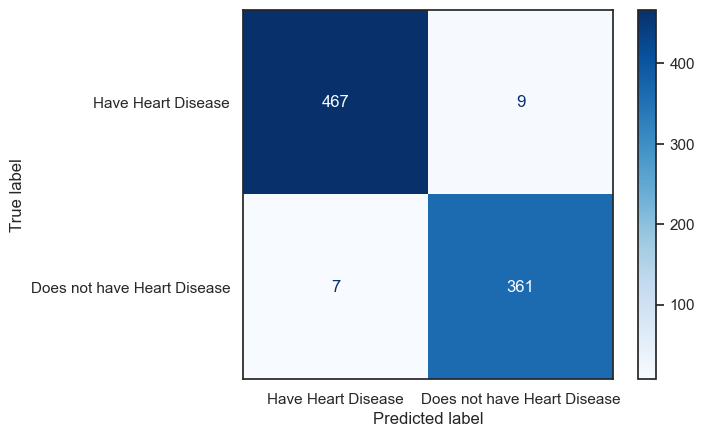

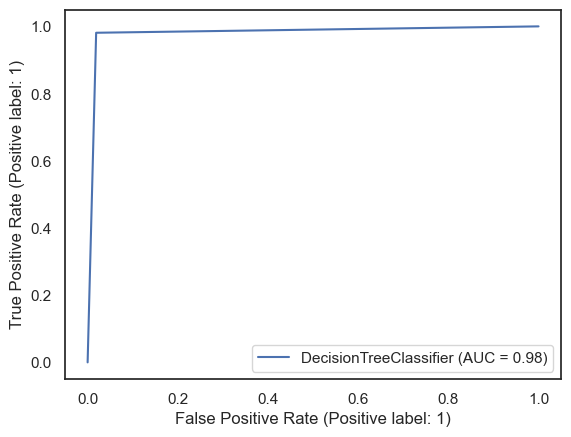

In [55]:
model = model_to_use("DT")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)

In [56]:
hd=np.array([40, 200, 78, 0, 250, 3.4, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 1.0, 0, 0, 1.0, 0, 1.0,]).reshape(1,-1)
hd = pd.DataFrame(hd, columns=cols)

In [57]:
hd

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPT_ASY,ChestPT_ATA,ChestPT_NAP,ChestPT_TA,restingECG_LVH,restingECG_Normal,restingECG_ST,ExAngina_N,ExAngina_Y,ST_slope_Down,ST_slope_Flat,ST_slope_Up
0,40.0,200.0,78.0,0.0,250.0,3.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [58]:
hd1 = scaler.transform(hd)

In [59]:
def predict(data):
    if model.predict(hd1)[0]==0:
        return ('Will not have Heart disease')
    else:
        return ('Will have Heart Disease')

In [60]:
predict(hd1)

'Will have Heart Disease'